In [1]:
# Importing modules
import pandas as pd


In [2]:
comp = pd.read_csv("CMS_complaints_clean.csv").dropna()

In [3]:
comp

,Unnamed: 0,CCN,Facility Name,Street Address,City,State,Zip Code,Accreditation Type,date,deficiency,defdesc,tag,text
0,1,10001.0,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,DNV GL,8/24/2017,Condition,GOVERNING BODY,A-0043,20228 This condition level deficiency was cit...
1,2,10001.0,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,DNV GL,8/24/2017,Standard,CHIEF EXECUTIVE OFFICER,A-0057,"20228 Based on observations, review of facili..."
2,3,10001.0,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,DNV GL,8/24/2017,Condition,PATIENT RIGHTS,A-0115,"20228 Based on observations, review of facili..."
3,4,10001.0,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,DNV GL,8/24/2017,Standard,PATIENT RIGHTS: CARE IN SAFE SETTING,A-0144,"20228 Based on observations, review of facili..."
4,5,10001.0,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,DNV GL,8/24/2017,Standard,PATIENT RIGHTS: CARE IN SAFE SETTING,A-0144,20228 22965 30952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18438,18427,673068.0,SUGARLAND REHAB HOSPITAL,7622 BRANFORD PL,SUGAR LAND,TX,77479.0,JC,12/17/2019,Standard,PATIENT RIGHTS: CARE IN SAFE SETTING,A-0144,"30124 Based on observation, interview, and ..."
18439,18428,673068.0,SUGARLAND REHAB HOSPITAL,7622 BRANFORD PL,SUGAR LAND,TX,77479.0,JC,12/17/2019,Standard,NURSING CARE PLAN,A-0396,"37492 Based on observation, record review and..."
18440,18429,673068.0,SUGARLAND REHAB HOSPITAL,7622 BRANFORD PL,SUGAR LAND,TX,77479.0,JC,12/17/2019,Standard,ADMINISTRATION OF DRUGS,A-0405,"10802 Based on observation, record review, a..."
18441,18430,673068.0,SUGARLAND REHAB HOSPITAL,7622 BRANFORD PL,SUGAR LAND,TX,77479.0,JC,12/17/2019,Condition,FOOD AND DIETETIC SERVICES,A-0618,"10802 Based on observation, interview, and ..."


In [4]:
#drop non-useful columns
text = comp.drop(columns=['Unnamed: 0', 'Street Address', 'Facility Name', 'City','State', 'Accreditation Type','deficiency','defdesc'], axis=1).sample(100)

# Print out the first rows of papers
text.head()

,CCN,Zip Code,date,tag,text
12648,390086.0,15801.0,8/3/2018,A-0043,19055 Based on the nature of the standard lev...
1173,50108.0,95816.0,1/26/2018,A-0309,36586 Based on interview and record review th...
378,21311.0,99901.0,5/23/2018,C-2406,30262 . Based on record review and intervie...
11409,360012.0,43081.0,1/24/2019,A-0489,"31007 Based on interview and record review, t..."
9804,324010.0,88012.0,10/3/2017,A-0806,"35054 Based on record review and interviews, ..."


In [6]:
# Load the regular expression library
import re

# Remove punctuation
text['text_processed'] = \
text['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
text['text_processed'] = \
text['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
text['text_processed'].head()

12648    19055  based on the nature of the standard lev...
1173     36586  based on interview and record review th...
378      30262     based on record review and interview...
11409    31007  based on interview and record review th...
9804     35054  based on record review and interviews t...
Name: text_processed, dtype: object

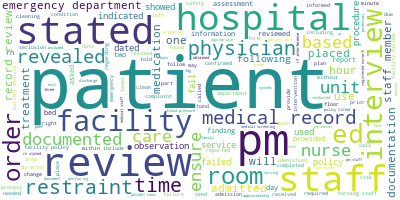

In [62]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(text['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [8]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = text.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muher\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['based', 'nature', 'standard', 'level', 'deficiencies', 'related', 'governing', 'body', 'facility', 'failed', 'substantially', 'comply', 'condition', 'findings', 'include', 'following', 'standards', 'cited', 'establish', 'non', 'compliance', 'condition', 'tag', 'information', 'reviewed', 'survey', 'provided', 'evidence', 'governing', 'body']


In [9]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 8), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 4), (19, 5), (20, 1), (21, 1), (22, 3), (23, 2), (24, 2), (25, 4), (26, 1), (27, 1), (28, 1), (29, 8)]


In [38]:
from pprint import pprint

In [39]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"patient" + 0.020*"staff" + 0.014*"pm" + 0.011*"stated" + '
  '0.009*"review" + 0.008*"interview" + 0.008*"facility" + 0.008*"patients" + '
  '0.008*"medical" + 0.007*"room"'),
 (1,
  '0.034*"patient" + 0.018*"staff" + 0.014*"facility" + 0.014*"stated" + '
  '0.013*"pm" + 0.011*"medical" + 0.008*"review" + 0.008*"order" + '
  '0.007*"nursing" + 0.007*"room"'),
 (2,
  '0.027*"patient" + 0.010*"review" + 0.009*"staff" + 0.008*"care" + '
  '0.008*"facility" + 0.008*"stated" + 0.007*"medical" + 0.007*"record" + '
  '0.007*"hospital" + 0.007*"pm"'),
 (3,
  '0.041*"patient" + 0.017*"nurse" + 0.015*"said" + 0.011*"staff" + 0.010*"pm" '
  '+ 0.008*"patients" + 0.008*"emergency" + 0.008*"hospital" + '
  '0.007*"facility" + 0.007*"review"'),
 (4,
  '0.044*"patient" + 0.014*"review" + 0.013*"staff" + 0.013*"pm" + '
  '0.011*"stated" + 0.008*"facility" + 0.008*"record" + 0.007*"order" + '
  '0.007*"medical" + 0.007*"patients"'),
 (5,
  '0.048*"patient" + 0.026*"staff" + 0.011*"stated

In [61]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = str(num_topics)

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.007482  0.004967       1        1  18.453235
1      0.011703 -0.007141       2        1  18.214179
5      0.002910 -0.012934       3        1  17.557800
4      0.001179 -0.001788       4        1  14.747696
7      0.019451 -0.004428       5        1   9.113976
9      0.004120 -0.008233       6        1   7.566677
0      0.002529 -0.005181       7        1   6.392642
3     -0.046275 -0.003334       8        1   4.430731
6     -0.007800  0.009114       9        1   2.257095
2      0.004701  0.028959      10        1   1.265969, topic_info=          Term         Freq        Total Category  logprob  loglift
396    patient  1815.000000  1815.000000  Default  30.0000  30.0000
62       staff   835.000000   835.000000  Default  29.0000  29.0000
468     review   471.000000   471.000000  Default  28.0000  28.0000
409         pm   463.000000   463.000000  Default  27.0000  27.0000
369      nurse   253.000000   253.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
203   document     1.471789    99.602716  Topic10  -5.9766   0.1546
1237    showed     1.512503   113.013398  Topic10  -5.9493   0.0556
25      failed     1.639943   194.643343  Topic10  -5.8684  -0.4072
620    nursing     1.636149   223.763842  Topic10  -5.8707  -0.5489
123      blood     1.538853   149.762397  Topic10  -5.9320  -0.2087

[789 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3644      1  0.387173  abdomen
3644      6  0.387173  abdomen
1354      1  0.133549    abuse
1354      2  0.066775    abuse
1354      3  0.300486    abuse
...     ...       ...      ...
1348      8  0.034563    wrist
1348      9  0.034563    wrist
1775      4  0.339376    wrong
2914      2  0.536878     york
4023      6  0.404136  younger

[2174 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 6, 5, 8, 10, 1, 4, 7, 3])